In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

import seaborn as sns
import numpy as np
import keras

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

In [4]:
#Let's print the shape of training and test data

print("Training data shape: ", X_train.shape)
print("Test data shape", X_test.shape)

print("Training label shape: ", y_train.shape)
print("Test label shape: ", y_test.shape)
print("First 5 training labels: ", y_train[:5])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training label shape:  (60000,)
Test label shape:  (10000,)
First 5 training labels:  [5 0 4 1 9]


In [5]:
num_classes = 10
batch_size = 128
nb_epoch = 10

In [7]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# Each cell of above matrix is having a value between 0-255 
# before applying machine learning algorithms, let's normalize the data # X => (X - Xmin)/(Xmax-Xmin) = X/255 

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('No. of train samples: ', X_train.shape[0])
print('No. of test samples: ', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
No. of train samples:  60000
No. of test samples:  10000


In [9]:
# Ket's convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4 layer CNN Model with 3*3 kernel size

In [10]:
model1=Sequential() # Initializing the model

# First ConvNet
model1.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

model1.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))


model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))

model1.add(BatchNormalization())

#maxpooling by (2,2 ) ,dropout,flattening
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.5))


model1.add(Flatten())

#hidden_layer
model1.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model1.add(Dropout(0.5))

model1.add(Dense(num_classes,activation='softmax'))

print(model1.summary())

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)       512       
________________________________________________

In [11]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
# Training the model

history = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 527s 9ms/step - loss: 0.2391 - accuracy: 0.9286 - val_loss: 0.1245 - val_accuracy: 0.9855
Epoch 2/10
60000/60000 [==============================] - 537s 9ms/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.0440 - val_accuracy: 0.9860
Epoch 3/10
60000/60000 [==============================] - 535s 9ms/step - loss: 0.0623 - accuracy: 0.9816 - val_loss: 0.0283 - val_accuracy: 0.9910
Epoch 4/10
60000/60000 [==============================] - 551s 9ms/step - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0309 - val_accuracy: 0.9907
Epoch 5/10
60000/60000 [==============================] - 550s 9ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0281 - val_accuracy: 0.9919
Epoch 6/10
60000/60000 [==============================] - 539s 9ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0221 - val_accuracy: 0.9921
Epoch 7/10
600

In [13]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 14s 1ms/step
Test loss: 0.022041849251561642
Test accuracy: 0.9929999709129333


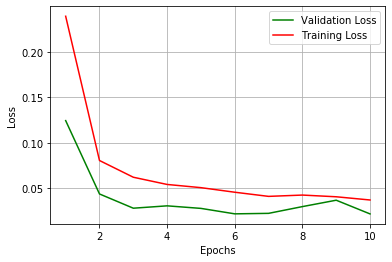

In [14]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

## Changing the dropout rate to 0.8

In [15]:
model1=Sequential() # Initializing the model

# First ConvNet
model1.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

model1.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))


model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.8))

model1.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))

model1.add(BatchNormalization())

#maxpooling by (2,2 ) ,dropout,flattening
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.8))


model1.add(Flatten())

#hidden_layer
model1.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model1.add(Dropout(0.8))

model1.add(Dense(num_classes,activation='softmax'))

print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)        

In [16]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [17]:
# Training the model

history = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 354s 6ms/step - loss: 1.8717 - accuracy: 0.4944 - val_loss: 1.2311 - val_accuracy: 0.5943
Epoch 2/10
60000/60000 [==============================] - 339s 6ms/step - loss: 0.7126 - accuracy: 0.7703 - val_loss: 0.3755 - val_accuracy: 0.8838
Epoch 3/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.5028 - accuracy: 0.8438 - val_loss: 0.1594 - val_accuracy: 0.9600
Epoch 4/10
60000/60000 [==============================] - 407s 7ms/step - loss: 0.3878 - accuracy: 0.8838 - val_loss: 0.3313 - val_accuracy: 0.9028
Epoch 5/10
60000/60000 [==============================] - 420s 7ms/step - loss: 0.3306 - accuracy: 0.9019 - val_loss: 0.1561 - val_accuracy: 0.9538
Epoch 6/10
60000/60000 [==============================] - 403s 7ms/step - loss: 0.2974 - accuracy: 0.9145 - val_loss: 0.1993 - val_accuracy: 0.9451
Epoch 7/10
60000/60000 [==============================] - 385s

In [18]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 16s 2ms/step
Test loss: 0.22723832533806562
Test accuracy: 0.9398999810218811


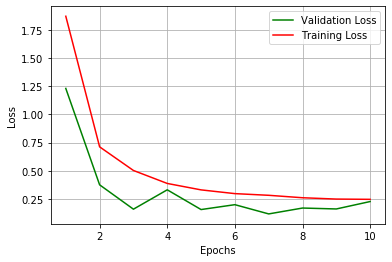

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

## Changing the dropout rate to 0.2

In [21]:
model1=Sequential() # Initializing the model

# First ConvNet
model1.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

model1.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))


model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))

model1.add(BatchNormalization())

#maxpooling by (2,2 ) ,dropout,flattening
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.2))


model1.add(Flatten())

#hidden_layer
model1.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model1.add(Dropout(0.2))

model1.add(Dense(num_classes,activation='softmax'))

print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)        

In [22]:
model1.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [23]:
# Training the model

history = model1.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 442s 7ms/step - loss: 0.1491 - accuracy: 0.9553 - val_loss: 0.0955 - val_accuracy: 0.9895
Epoch 2/10
60000/60000 [==============================] - 387s 6ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0546 - val_accuracy: 0.9840
Epoch 3/10
60000/60000 [==============================] - 416s 7ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0264 - val_accuracy: 0.9914
Epoch 4/10
60000/60000 [==============================] - 394s 7ms/step - loss: 0.0290 - accuracy: 0.9911 - val_loss: 0.0365 - val_accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 449s 7ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0298 - val_accuracy: 0.9920
Epoch 6/10
60000/60000 [==============================] - 410s 7ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0280 - val_accuracy: 0.9917
Epoch 7/10
60000/60000 [==============================] - 366s

In [24]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 16s 2ms/step
Test loss: 0.03512107918624624
Test accuracy: 0.9921000003814697


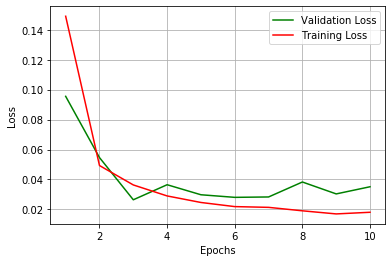

In [25]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

## 4 Convolution layers with 5*5 kernel size

In [27]:
model2=Sequential() # Initializing the model

# First ConvNet
model2.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))

model2.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))


model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128,kernel_size=(5,5),
                   activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.5))


model2.add(Flatten())

#hidden layer
model2.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model2.add(Dropout(0.5))

model2.add(Dense(num_classes,activation='softmax'))

print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 128)         204928    
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)        

In [28]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [29]:
# Training the model
history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 359s 6ms/step - loss: 0.1954 - accuracy: 0.9391 - val_loss: 0.0761 - val_accuracy: 0.9809
Epoch 2/10
60000/60000 [==============================] - 361s 6ms/step - loss: 0.0752 - accuracy: 0.9781 - val_loss: 0.0286 - val_accuracy: 0.9913
Epoch 3/10
60000/60000 [==============================] - 341s 6ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.0257 - val_accuracy: 0.9912
Epoch 4/10
60000/60000 [==============================] - 465s 8ms/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 0.0261 - val_accuracy: 0.9906
Epoch 5/10
60000/60000 [==============================] - 573s 10ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0332 - val_accuracy: 0.9911
Epoch 6/10
60000/60000 [==============================] - 540s 9ms/step - loss: 0.0422 - accuracy: 0.9878 - val_loss: 0.0309 - val_accuracy: 0.9924
Epoch 7/10
60000/60000 [==============================] - 567

In [30]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 27s 3ms/step
Test loss: 0.020990679916361204
Test accuracy: 0.9943000078201294


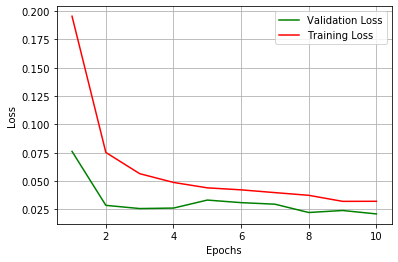

In [31]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### Changing the dropout rate to 0.8

In [32]:
model2=Sequential() # Initializing the model

# First ConvNet
model2.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))

model2.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))


model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.8))

model2.add(Conv2D(128,kernel_size=(5,5),
                   activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.8))


model2.add(Flatten())

#hidden layer
model2.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model2.add(Dropout(0.8))

model2.add(Dense(num_classes,activation='softmax'))

print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 128)         204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 128)        

In [33]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [34]:
# Training the model

history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 548s 9ms/step - loss: 1.6143 - accuracy: 0.4881 - val_loss: 0.7136 - val_accuracy: 0.8021
Epoch 2/10
60000/60000 [==============================] - 540s 9ms/step - loss: 0.4909 - accuracy: 0.8488 - val_loss: 0.1857 - val_accuracy: 0.9520
Epoch 3/10
60000/60000 [==============================] - 548s 9ms/step - loss: 0.3236 - accuracy: 0.9045 - val_loss: 0.0913 - val_accuracy: 0.9740
Epoch 4/10
60000/60000 [==============================] - 530s 9ms/step - loss: 0.2664 - accuracy: 0.9242 - val_loss: 0.1157 - val_accuracy: 0.9725
Epoch 5/10
60000/60000 [==============================] - 533s 9ms/step - loss: 0.2406 - accuracy: 0.9318 - val_loss: 0.0731 - val_accuracy: 0.9802
Epoch 6/10
60000/60000 [==============================] - 532s 9ms/step - loss: 0.2206 - accuracy: 0.9374 - val_loss: 0.1145 - val_accuracy: 0.9733
Epoch 7/10
60000/60000 [==============================] - 545s

In [35]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 24s 2ms/step
Test loss: 0.06979307891329391
Test accuracy: 0.9833999872207642


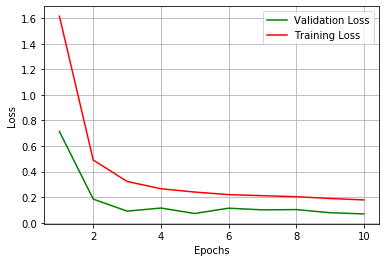

In [36]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### Changing the dropout to 0.2

In [37]:
model2=Sequential() # Initializing the model

# First ConvNet
model2.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))

model2.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))


model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128,kernel_size=(5,5),
                   activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.2))


model2.add(Flatten())

#hidden layer
model2.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model2.add(Dropout(0.2))

model2.add(Dense(num_classes,activation='softmax'))

print(model2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 128)         204928    
_________________________________________________________________
batch_normalization_6 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 128)        

In [38]:
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [39]:
# Training the model

history = model2.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 534s 9ms/step - loss: 0.1239 - accuracy: 0.9619 - val_loss: 0.0679 - val_accuracy: 0.9805
Epoch 2/10
60000/60000 [==============================] - 532s 9ms/step - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0539 - val_accuracy: 0.9820
Epoch 3/10
60000/60000 [==============================] - 444s 7ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0362 - val_accuracy: 0.9888
Epoch 4/10
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0402 - val_accuracy: 0.9890
Epoch 5/10
60000/60000 [==============================] - 330s 6ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0268 - val_accuracy: 0.9916
Epoch 6/10
60000/60000 [==============================] - 329s 5ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0273 - val_accuracy: 0.9916
Epoch 7/10
60000/60000 [==============================] - 338s

In [40]:
score = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 19s 2ms/step
Test loss: 0.027773732883542696
Test accuracy: 0.9929999709129333


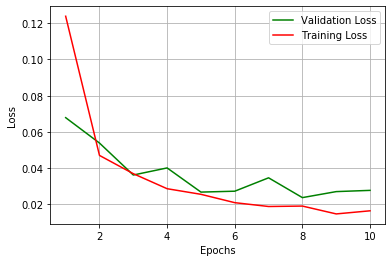

In [41]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### 3 layer convolution layer with 3*3 kernel size

In [42]:
model3=Sequential() # Initializing the model

# First ConvNet
model3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',padding='valid'))


model3.add(Dropout(0.5))


#hidden_layer
model3.add(Flatten())

model3.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model3.add(Dense(num_classes,activation='softmax'))

print(model3.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_19 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               1982720   
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [43]:
model3.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [44]:
# Training the model

history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1748 - accuracy: 0.9464 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 2/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0368 - val_accuracy: 0.9875
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0390 - accuracy: 0.9876 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 4/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0262 - val_accuracy: 0.9915
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0260 - val_accuracy: 0.9918
Epoch 7/10
60000/60000 [==============================] - 89s 1ms/st

In [45]:
score = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 4s 436us/step
Test loss: 0.030644286913338148
Test accuracy: 0.9908000230789185


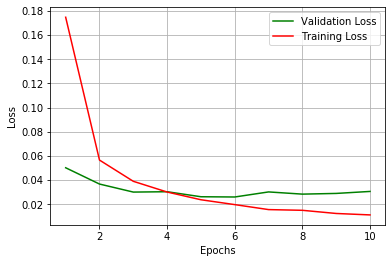

In [46]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### Changing the dropout rate to 0.8

In [47]:
model3=Sequential() # Initializing the model

# First ConvNet
model3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',padding='valid'))


model3.add(Dropout(0.8))


#hidden_layer
model3.add(Flatten())

model3.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model3.add(Dense(num_classes,activation='softmax'))

print(model3.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_20 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               1982720   
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [48]:
model3.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [49]:
# Training the model

history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2279 - accuracy: 0.9286 - val_loss: 0.0513 - val_accuracy: 0.9828
Epoch 2/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0831 - accuracy: 0.9742 - val_loss: 0.0337 - val_accuracy: 0.9890
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0268 - val_accuracy: 0.9912
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0258 - val_accuracy: 0.9917
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0387 - accuracy: 0.9870 - val_loss: 0.0231 - val_accuracy: 0.9915
Epoch 7/10
60000/60000 [==============================] - 89s 1ms/st

In [50]:
score = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 4s 432us/step
Test loss: 0.02036657058280398
Test accuracy: 0.9919000267982483


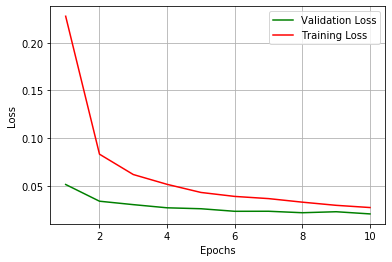

In [51]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### Changing dropout rate to 0.2

In [52]:
model3=Sequential() # Initializing the model

# First ConvNet
model3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu',padding='valid'))


model3.add(Dropout(0.2))


#hidden_layer
model3.add(Flatten())

model3.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model3.add(Dense(num_classes,activation='softmax'))

print(model3.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_21 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               1982720   
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [53]:
model3.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [54]:
# Training the model

history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1458 - accuracy: 0.9572 - val_loss: 0.0412 - val_accuracy: 0.9866
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0330 - val_accuracy: 0.9887
Epoch 3/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0347 - val_accuracy: 0.9885
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0313 - val_accuracy: 0.9896
Epoch 6/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0299 - val_accuracy: 0.9907
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/st

In [55]:
score = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 4s 426us/step
Test loss: 0.03524074672339475
Test accuracy: 0.9908999800682068


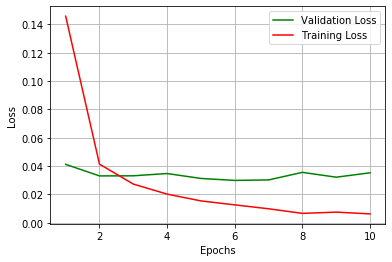

In [56]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### 5 layer convolution layer with 5*5 kernel size

In [57]:
model4=Sequential() # Initializing the model

# First ConvNet
model4.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))

model4.add(BatchNormalization())


model4.add(Conv2D(128,kernel_size=(5,5),
                    activation='relu'))
model4.add(Dropout(0.5))



model4.add(Flatten())

#hidden_layer
model4.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dense(512,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dropout(0.5))

model4.add(Dense(num_classes,activation='softmax'))

print(model4.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_7 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_22 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)            

In [58]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [59]:
# Training the model

history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.1540 - accuracy: 0.9521 - val_loss: 0.0855 - val_accuracy: 0.9843
Epoch 2/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0571 - accuracy: 0.9838 - val_loss: 0.0429 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 0.0632 - val_accuracy: 0.9838
Epoch 4/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0354 - accuracy: 0.9904 - val_loss: 0.0400 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0348 - accuracy: 0.9910 - val_loss: 0.0307 - val_accuracy: 0.9916
Epoch 6/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.0318 - val_accuracy: 0.9918
Epoch 7/10
60000/60000 [==============================] - 140s

In [60]:
score = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 7s 730us/step
Test loss: 0.044226658638985825
Test accuracy: 0.9907000064849854


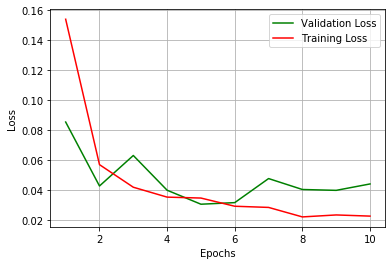

In [61]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### Changing the dropout rate to 0.8

In [62]:
model4=Sequential() # Initializing the model

# First ConvNet
model4.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))

model4.add(BatchNormalization())


model4.add(Conv2D(128,kernel_size=(5,5),
                    activation='relu'))
model4.add(Dropout(0.8))



model4.add(Flatten())

#hidden_layer
model4.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dense(512,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dropout(0.8))

model4.add(Dense(num_classes,activation='softmax'))

print(model4.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_24 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)            

In [63]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [64]:
# Training the model

history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.3136 - accuracy: 0.9008 - val_loss: 0.0799 - val_accuracy: 0.9799
Epoch 2/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0907 - accuracy: 0.9767 - val_loss: 0.0639 - val_accuracy: 0.9834
Epoch 3/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0745 - accuracy: 0.9816 - val_loss: 0.0393 - val_accuracy: 0.9904
Epoch 4/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0632 - accuracy: 0.9840 - val_loss: 0.0421 - val_accuracy: 0.9906
Epoch 5/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0656 - accuracy: 0.9847 - val_loss: 0.0316 - val_accuracy: 0.9923
Epoch 6/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0590 - accuracy: 0.9855 - val_loss: 0.0375 - val_accuracy: 0.9912
Epoch 7/10
60000/60000 [==============================] - 130s

In [65]:
score = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 8s 757us/step
Test loss: 0.04110135558335446
Test accuracy: 0.9919999837875366


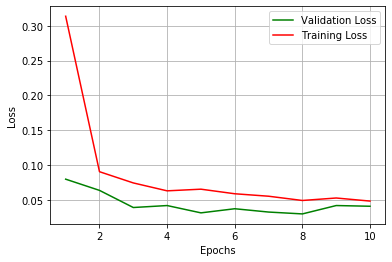

In [66]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show()

### Changing the dropout rate to 0.2

In [67]:
model4=Sequential() # Initializing the model

# First ConvNet
model4.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    input_shape=input_shape))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Conv2D(64,kernel_size=(5,5),
                    activation='relu'))

model4.add(BatchNormalization())


model4.add(Conv2D(128,kernel_size=(5,5),
                    activation='relu'))
model4.add(Dropout(0.2))



model4.add(Flatten())

#hidden_layer
model4.add(Dense(256,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dense(512,activation='relu',kernel_initializer='random_uniform'))

model4.add(Dropout(0.2))

model4.add(Dense(num_classes,activation='softmax'))

print(model4.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 4, 4, 128)         204928    
_________________________________________________________________
dropout_26 (Dropout)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2048)            

In [68]:
model4.compile(optimizer='adam', 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [69]:
# Training the model

history = model4.fit(X_train, y_train, batch_size = batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.1256 - accuracy: 0.9615 - val_loss: 0.0762 - val_accuracy: 0.9854
Epoch 2/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0473 - accuracy: 0.9866 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0355 - accuracy: 0.9898 - val_loss: 0.0367 - val_accuracy: 0.9896
Epoch 4/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0297 - accuracy: 0.9916 - val_loss: 0.0579 - val_accuracy: 0.9829
Epoch 5/10
60000/60000 [==============================] - 133s 2ms/step - loss: 0.0237 - accuracy: 0.9937 - val_loss: 0.0329 - val_accuracy: 0.9920
Epoch 6/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0552 - val_accuracy: 0.9866
Epoch 7/10
60000/60000 [==============================] - 130s

In [70]:
score = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 7s 745us/step
Test loss: 0.038139941784558276
Test accuracy: 0.9926999807357788


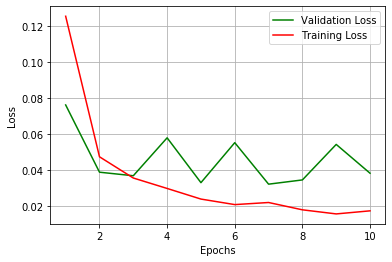

In [71]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,nb_epoch+1))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

## Conclusions

In [73]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Numer of Layers", "Kernel Size", "BatchNormalization", "Dropout", "Accuracy"]

x.add_row(["3",'3*3', 'NO','0.5', 99.08])
x.add_row(["3",'3*3', 'NO','0.8', 99.19])
x.add_row(["3",'3*3', 'NO','0.2', 99.08])


x.add_row(["4",'3*3', 'YES','0.5', 99.29])
x.add_row(["4",'3*3', 'YES','0.8', 93.98])
x.add_row(["4",'3*3', 'YES','0.2', 99.21])

x.add_row(["4",'5*5', 'YES','0.5', 99.43])
x.add_row(["4",'5*5', 'YES','0.8', 98.33])
x.add_row(["4",'5*5', 'YES','0.2', 99.29])

x.add_row(["5",'5*5', 'YES','0.5', 99.07])
x.add_row(["5",'5*5', 'YES','0.8', 99.19])
x.add_row(["5",'5*5', 'YES','0.2', 99.26])



print(x)

+-----------------+-------------+--------------------+---------+----------+
| Numer of Layers | Kernel Size | BatchNormalization | Dropout | Accuracy |
+-----------------+-------------+--------------------+---------+----------+
|        3        |     3*3     |         NO         |   0.5   |  99.08   |
|        3        |     3*3     |         NO         |   0.8   |  99.19   |
|        3        |     3*3     |         NO         |   0.2   |  99.08   |
|        4        |     3*3     |        YES         |   0.5   |  99.29   |
|        4        |     3*3     |        YES         |   0.8   |  93.98   |
|        4        |     3*3     |        YES         |   0.2   |  99.21   |
|        4        |     5*5     |        YES         |   0.5   |  99.43   |
|        4        |     5*5     |        YES         |   0.8   |  98.33   |
|        4        |     5*5     |        YES         |   0.2   |  99.29   |
|        5        |     5*5     |        YES         |   0.5   |  99.07   |
|        5  